SWASTHIKA M 24BAD121
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  peri

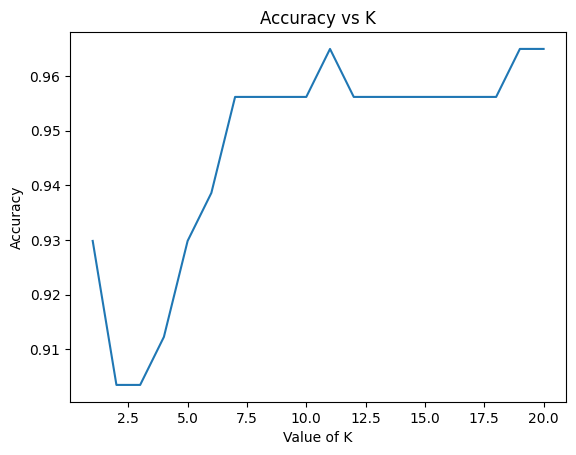

Best K: 11
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



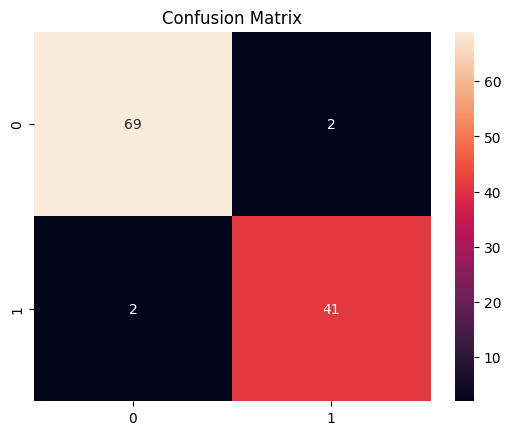

Number of Misclassified Samples: 4


In [2]:
print("SWASTHIKA M 24BAD121")
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset
df = pd.read_csv("/content/breast-cancer.csv")   # Download from Kaggle and keep in same folder

# Data Inspection
print(df.head())
print(df.info())
print(df.isnull().sum())

# Encode Target Variable
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # Benign=0, Malignant=1

# Select Features
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
        'area_mean', 'smoothness_mean']]
y = df['diagnosis']

# Feature Scaling (Very Important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Experiment with Different K Values
accuracy_list = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

# Plot Accuracy vs K
plt.plot(range(1,21), accuracy_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

# Train Final Model (Best K)
best_k = accuracy_list.index(max(accuracy_list)) + 1
print("Best K:", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Identify Misclassified Cases
misclassified = X_test[y_test != y_pred]
print("Number of Misclassified Samples:", misclassified.shape[0])

SWASTHIKA M 24BAD121
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  

/tmp/ipython-input-2037041433.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


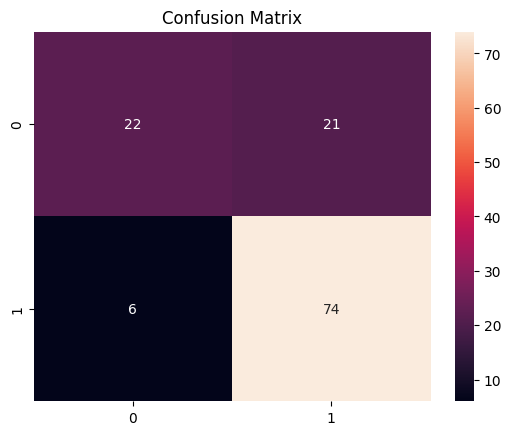

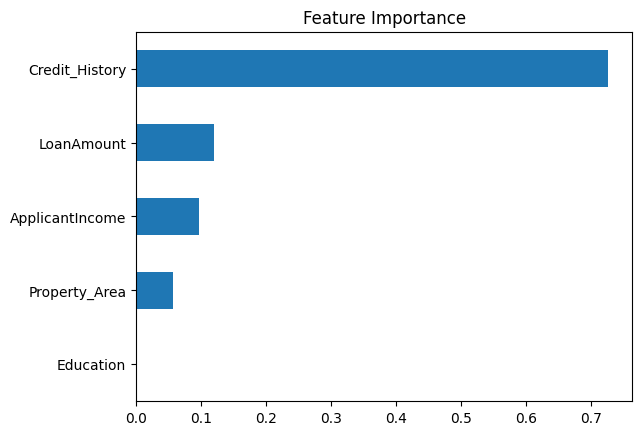

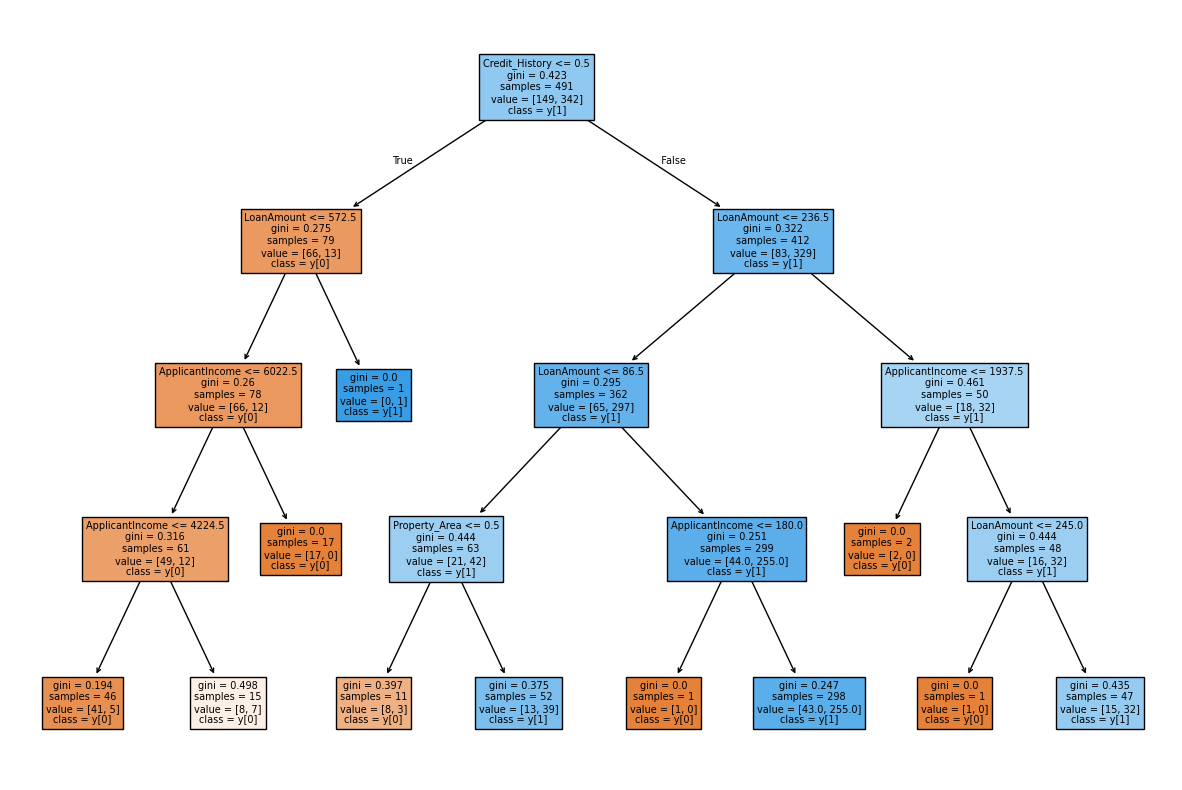

Training Accuracy: 0.824847250509165
Testing Accuracy: 0.7804878048780488


In [3]:
print("SWASTHIKA M 24BAD121")
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset
df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")  # Download from Kaggle

# Data Inspection
print(df.head())
print(df.isnull().sum())

# Handle Missing Values
df.fillna(method='ffill', inplace=True)

# Encode Categorical Variables
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Select Features
X = df[['ApplicantIncome', 'LoanAmount', 'Credit_History',
        'Education', 'Property_Area']]
y = df['Loan_Status']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
importance = pd.Series(dt.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()

# Tree Structure Plot
plt.figure(figsize=(15,10))
plot_tree(dt, feature_names=X.columns, class_names=True, filled=True)
plt.show()

# Check Overfitting (Train vs Test Accuracy)
train_acc = dt.score(X_train, y_train)
test_acc = dt.score(X_test, y_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)